# K-means Segmenting
Centroid based approach to clustering with Euclidean distance constraints

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
from sklearn.decomposition import PCA
import os
from sklearn.preprocessing import OrdinalEncoder
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv('Live_20210128.csv')
df=df.drop(columns=['Column1','Column2','Column3','Column4'])
ordinal_encoder = OrdinalEncoder()
df["status_type_code"] = ordinal_encoder.fit_transform(df[["status_type"]])
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_code
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3.0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1.0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3.0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1.0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1.0


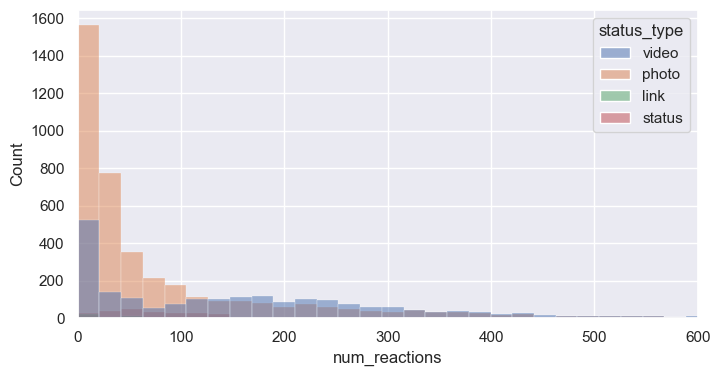

In [3]:
sns.set(rc={'figure.figsize':(8,4)})
sns.histplot(data=df,x='num_reactions',hue='status_type')
plt.xlim(0,600)
plt.show()

# Clustering Intuition
Grouping data into clusters

## 1 Dimensional Clustering

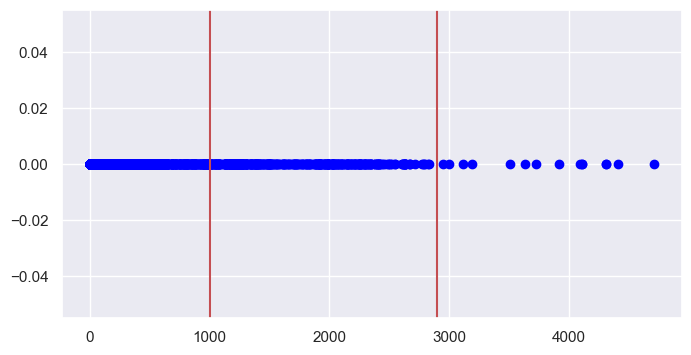

In [4]:
# 1D
plt.scatter(df['num_reactions'], np.zeros_like(df['num_reactions']), color='blue')
plt.axvline(1000,-1,1,color='r')
plt.axvline(2900,-1,1,color='r')
# plt.axvline(3400,-1,1,color='r')
plt.show()

## 2 Dimensional Clustering

31.821631205673757
218.95638359329868


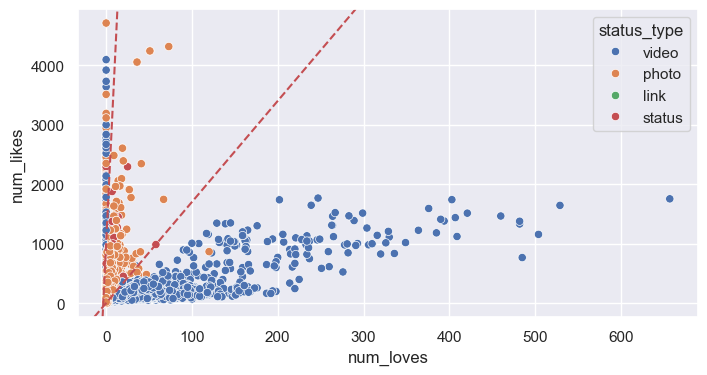

In [5]:
ax=sns.scatterplot(data=df,x='num_loves',y='num_likes',hue='status_type')
print(df[df['num_loves']>0]['num_loves'].mean())
print(df[df['num_likes']>0]['num_likes'].mean())
# plt.axvline(32,0,5000,color='r')
# plt.axhline(219,0,5000,color='r')
ax.axline((0, 0), slope=17, color='r', linestyle='--', label="y=x line")
ax.axline((0, 1000), slope=300, color='r', linestyle='--', label="y=x line")

plt.show()

## 3 Dimensional Clustering

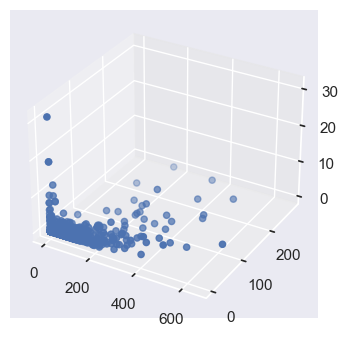

In [6]:
ax = plt.axes(projection='3d')
ax.scatter3D(df['num_loves'], df['num_wows'], df['num_angrys']) #, c=df['num_loves'], cmap='Greens')
plt.show()

## K-Means Algorithm

In [7]:
X=df.drop(columns=['status_id','status_type','status_published'])
print("shape:",X.shape)
X.head()

shape: (7050, 10)


,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_code
0,529,512,262,432,92,3,1,1,0,3.0
1,150,0,0,150,0,0,0,0,0,1.0
2,227,236,57,204,21,1,1,0,0,3.0
3,111,0,0,111,0,0,0,0,0,1.0
4,213,0,0,204,9,0,0,0,0,1.0


In [8]:
def kmeans_fit_plot(X,n,x_feature,y_feature):
    X=X[list([x_feature,y_feature])]
    # kmeans
    kmeans = KMeans(n_clusters=n, random_state=0) 
    label = kmeans.fit_predict(X)
    center=kmeans.cluster_centers_
    np.set_printoptions(suppress=True)
    print(center)

    colors=['red','yellow','blue','green','orange','purple','pink']
    u_labels = np.unique(label)
    
    fig, ax = plt.subplots()
    for i in u_labels:
        ax.scatter(df[label == i][x_feature],df[label == i][y_feature],c=colors[i],label=i)
    ax.scatter(center[:,0] , center[:,1]  , s = 40, color = 'k')
    ax.set_xlabel(x_feature)
    ax.set_ylabel(y_feature)
    ax.legend()
    plt.show()

[[ 103.60387985    0.5034418 ]
 [1035.37002342    2.42388759]
 [2242.36796537    2.84415584]]


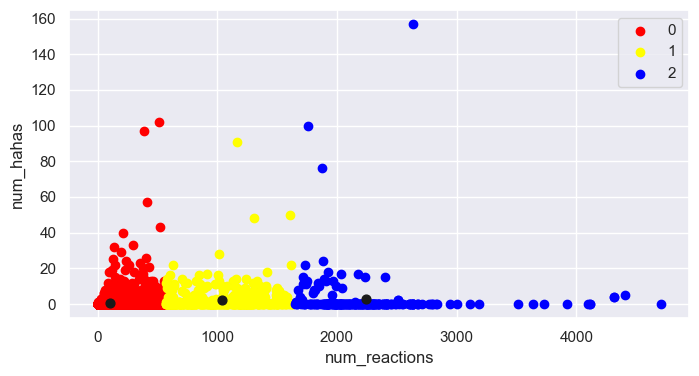

In [9]:
kmeans_fit_plot(X,3,'num_reactions','num_hahas')

## Exploratory PCA for Dimensionality Reduction 

Reduce dimensionality without loss of information

$$
d(x,y) = \sqrt{sum_{i=1}^{d} (x_i - y_i)^2}
$$

Euclidian distance breaks down in higher dimension (d>1,000)

Principal component analysis reorients the feature space to span the directions of greatest variance.


Scale data before PCA and K-means, because both depend on distance and variance.

In [10]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:3]

array([[ 0.64610394,  0.32335035,  1.6868788 ,  0.48272661,  1.98326643,
         0.1961959 ,  0.07671305,  0.47357035, -0.15574803,  1.37428794],
       [-0.17319166, -0.25220622, -0.3041444 , -0.14472021, -0.3184544 ,
        -0.147879  , -0.17600986, -0.152587  , -0.15574803, -0.74810636],
       [-0.00673846,  0.01308938,  0.12901714, -0.02457082,  0.2069384 ,
        -0.03318737,  0.07671305, -0.152587  , -0.15574803,  1.37428794]])

In [11]:
# pca   
def pca_transform(X):
    pca = PCA(n_components=2)
    X_pca=pca.fit_transform(X)
    pc1=X_pca[:,0]
    pc2=X_pca[:,1]
    pca_df = pd.DataFrame(X_pca,columns=["PC1", "PC2"])
    pca_df["status_type"] = df["status_type"].values
    return pca, X_pca, pca_df

In [12]:
print("PCA without scaling")
pca, X_pca, pca_df = pca_transform(X)
print("variance covered in principal component 1 and principal component 2")
print(pca.explained_variance_ratio_)
print("cumulative variance covered in 1 componenet and in 2 components")
print(np.cumsum(pca.explained_variance_ratio_))

print("PCA with scaling")
scaled_pca, X_scaled_pca, scaled_pca_df = pca_transform(X_scaled)
print("variance covered in principal component 1 and principal component 2")
print(scaled_pca.explained_variance_ratio_)
print("cumulative variance covered in 1 componenet and in 2 components")
print(np.cumsum(scaled_pca.explained_variance_ratio_))

PCA without scaling
variance covered in principal component 1 and principal component 2
[0.66306765 0.32732326]
cumulative variance covered in 1 componenet and in 2 components
[0.66306765 0.99039092]
PCA with scaling
variance covered in principal component 1 and principal component 2
[0.36137004 0.17675502]
cumulative variance covered in 1 componenet and in 2 components
[0.36137004 0.53812506]


With only 10 features, reducing to two principal components would discard a substantial portion of the information, so PCA is used only for visualization.


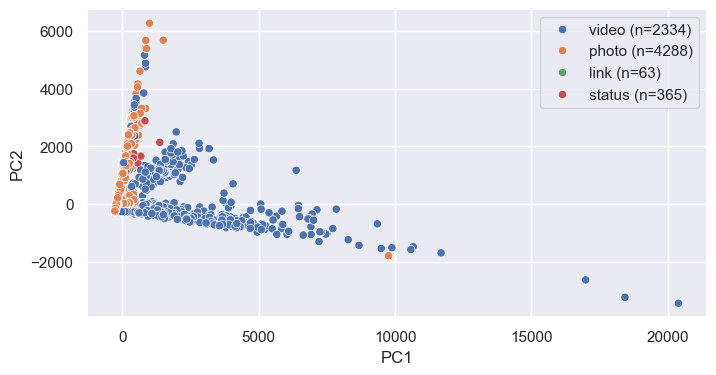

In [13]:
ax = sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="status_type", legend="full")
counts = pca_df["status_type"].value_counts()
handles, labels = ax.get_legend_handles_labels()
new_labels = [f"{lab} (n={counts[lab]})" for lab in labels]
ax.legend(handles=handles, labels=new_labels)
plt.show()

# Clustering

Plot with pca after training for 2-D visualization of 10-D model

In [14]:
def plot_labeled_clusters(X, n):
    X = np.asarray(X)  
    kmeans = KMeans(n_clusters=n, random_state=0)
    labels = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
        
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    centroids_pca = pca.transform(centroids)

    for i in np.unique(labels):
        plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=i)

    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=30, c="k")
    plt.legend()
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()
    return labels, kmeans

No PCA K-means on scaled data

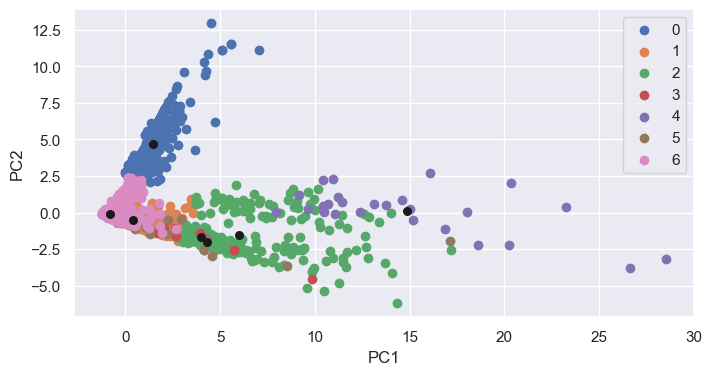

In [15]:
labels, kmeans = plot_labeled_clusters(X_scaled,7)

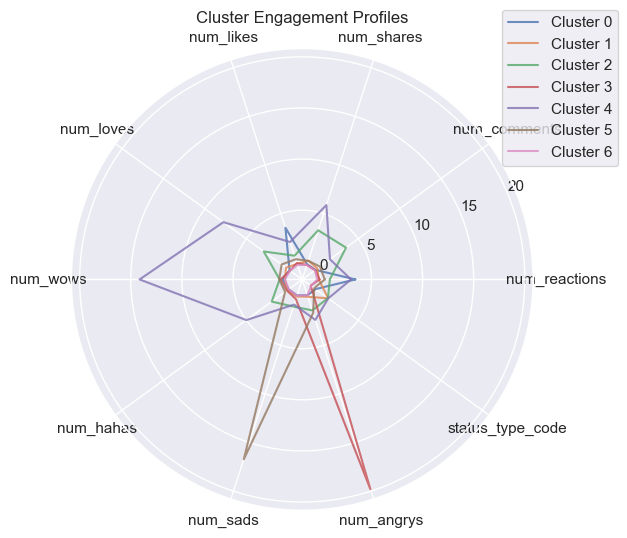

In [16]:
labels = X.columns
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
angles = np.r_[angles, angles[0]]

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)

for i, centroid in enumerate(kmeans.cluster_centers_):
    values = np.r_[centroid, centroid[0]]
    ax.plot(angles, values, label=f"Cluster {i}", alpha=0.8)

ax.set_thetagrids(angles[:-1]*180/np.pi, labels)
plt.legend(bbox_to_anchor=(1.2, 1.1))
plt.title("Cluster Engagement Profiles")
plt.show()

## Optimal K Clusters - Elbow Plot

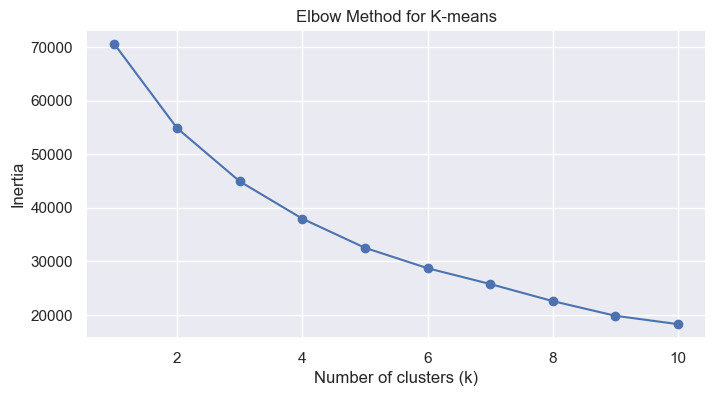

In [17]:
inertia = []

K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)   
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-means")
plt.show()

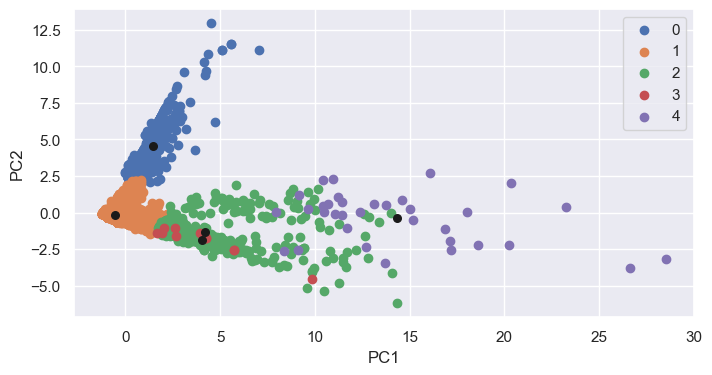

In [18]:
labels, kmeans=plot_labeled_clusters(X_scaled,5)

In [19]:
df["dist_to_centroid"] = kmeans.transform(X_scaled).min(axis=1)
df["cluster_label"] = labels
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_code,dist_to_centroid,cluster_label
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,3.0,2.644050,2
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,1.0,0.688326,1
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,3.0,1.641130,1
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,1.0,0.672107,1
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,1.0,0.749525,1


cluster_label
1    6109
2     505
0     391
4      34
3      11
Name: count, dtype: int64


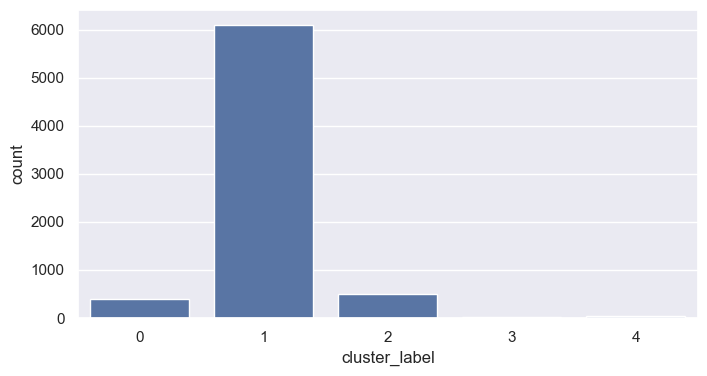

In [20]:
print(df['cluster_label'].value_counts())
sns.countplot(df,x='cluster_label')
plt.show()

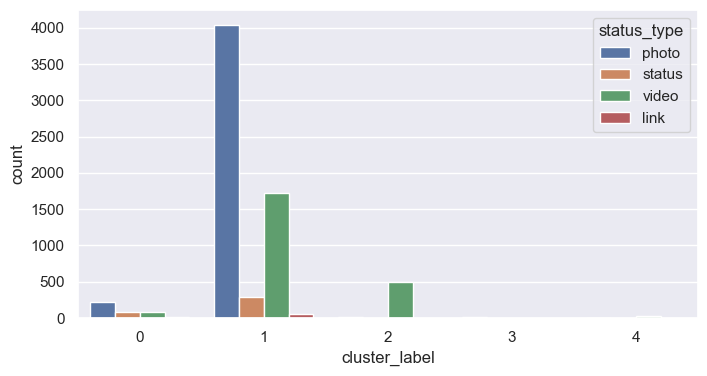

In [21]:
sns.countplot(df,hue='status_type',x='cluster_label')
plt.show()

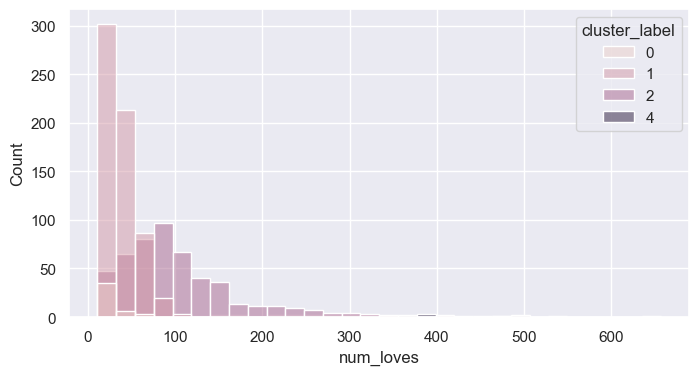

In [22]:
sns.histplot(df[df['num_loves']>10],x='num_loves',hue='cluster_label',stat='count',common_norm=False,bins=30)
plt.show()